Accuracy: 0.8305084745762712
F1 score: 0.8979591836734693
Precision: 0.8148148148148148
Recall: 1.0
Balanced Accuracy: 0.6666666666666666
AUC Score: 0.7833333333333333
Confusion matrix:


/Users/huzaifashafiq/miniforge3/envs/BMEN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


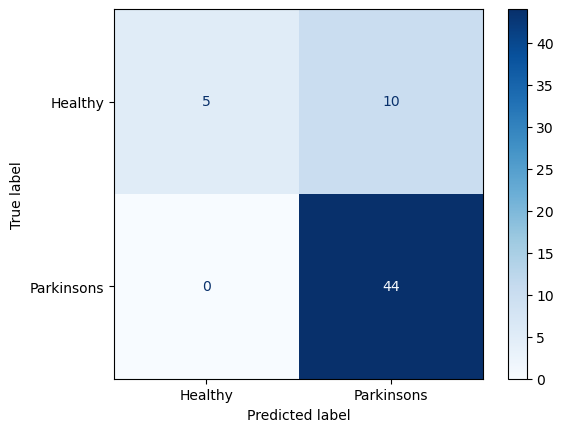

/Users/huzaifashafiq/miniforge3/envs/BMEN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


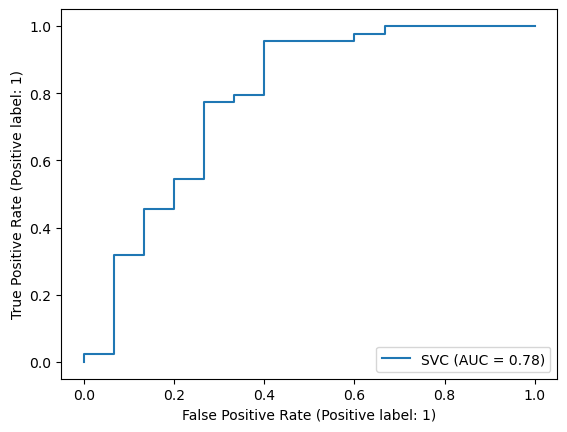

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, recall_score, precision_score, balanced_accuracy_score, roc_auc_score

# Load data from CSV file
data = pd.read_csv('parkinsons.data.csv')

# Separate features and target variable
X = data.drop(['status'], axis=1)
y = data['status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM classifier with radial basis function (RBF) kernel and default parameters
clf = SVC(kernel='rbf')

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = clf.predict(X_test)

# Calculate additional metrics
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, clf.decision_function(X_test))

# Print the accuracy, F1 score, precision, recall, balanced accuracy, and confusion matrix of the classifier
print("Accuracy:", clf.score(X_test, y_test))
print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("Balanced Accuracy:", balanced_accuracy)
print("AUC Score:", auc_score)
print("Confusion matrix:")
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Healthy', 'Parkinsons'], cmap=plt.cm.Blues)
plt.show()

# Plot ROC curve
plot_roc_curve(clf, X_test, y_test)
plt.show()

